In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = pd.read_csv('/content/BufferLatency.csv', delimiter=',')

# Separate features (X) and target variable (y)
X = data.iloc[:, :2]  # First two columns: MemCellType and numRowSubArray/numColSubArray
y = data.iloc[:, 2:]  # Columns from position 2 onwards: Layer1, Layer2, ...

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=35)
model.fit(X, y)

# Now you can use this model to predict buffer latency for new data
# For example, if you want to predict buffer latency for MemCellType=1, numRowSubArray/numColSubArray=64, and Layer=10
new_data = pd.DataFrame({
    'MemCellType': [1],
    'numRowSubArray/numColSubArray': [512]
})
training_accuracy = model.score(X, y)
print(f"Training Accuracy: {training_accuracy*100}%")
# Predicting buffer latency for new data
predicted_buffer_latency = model.predict(new_data)
print("Predicted Buffer Latency:", predicted_buffer_latency)


Training Accuracy: 96.78447906706947%
Predicted Buffer Latency: [[1.6786577e+04 2.9124904e+04 1.3167884e+04 3.2545199e+04 1.4597634e+04
  3.5965499e+04 1.6027473e+04 3.9385798e+04 1.6564567e+04 4.2806077e+04
  1.6655292e+04 4.6226380e+04 1.6746065e+04 4.9336886e+04 9.0824795e+03
  3.5939959e+03 9.9472406e+03 3.7160909e+03 1.0811988e+04 3.7358557e+03
  1.1676771e+04 3.7556165e+03 1.2541497e+04 3.7753821e+03 1.3406222e+04
  3.7951405e+03 1.5562574e+04 2.4866030e+03 6.8220327e+02 2.7027944e+03
  6.8583324e+02 2.9189788e+03 6.8946346e+02 3.1351686e+03 6.9309361e+02
  3.3513593e+03 6.9672358e+02 3.5675444e+03 6.7040567e+02 4.1660048e+01]]


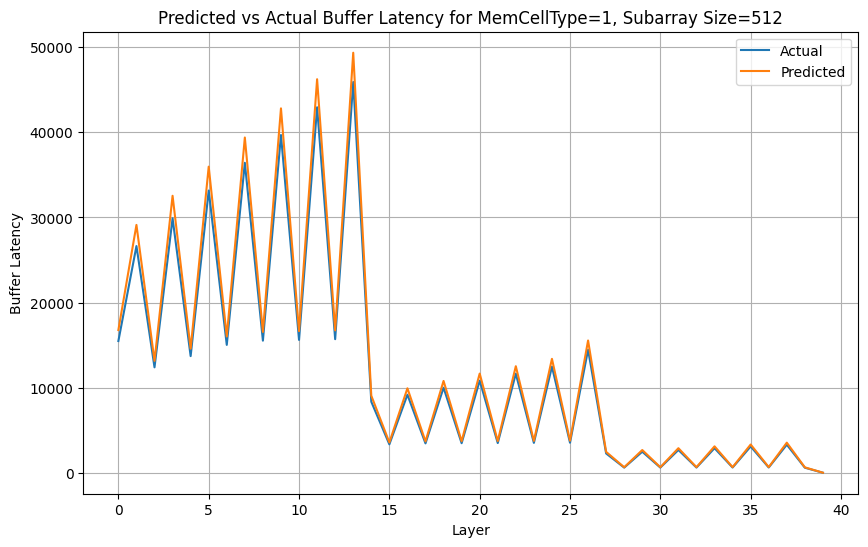

In [2]:
import matplotlib.pyplot as plt

# Choose MemCellType and numRowSubArray/numColSubArray
mem_cell_type = 1
subarray_size = 512

# Filter the training data for the chosen MemCellType and numRowSubArray/numColSubArray
filtered_data = data[(data['MemCellType'] == mem_cell_type) & (data['numRowSubArray/numColSubArray'] == subarray_size)]

# Extract the actual BufferLatency values
actual_values = filtered_data.iloc[:, 2:]

# Plot the predicted BufferLatency and the actual BufferLatency values
plt.figure(figsize=(10, 6))
plt.plot(actual_values.values[0], label='Actual')
plt.plot(predicted_buffer_latency[0], label='Predicted')
plt.xlabel('Layer')
plt.ylabel('Buffer Latency')
plt.title(f'Predicted vs Actual Buffer Latency for MemCellType={mem_cell_type}, Subarray Size={subarray_size}')
plt.legend()
plt.grid(True)
plt.show()


Training Accuracy: 0.9332236139258718


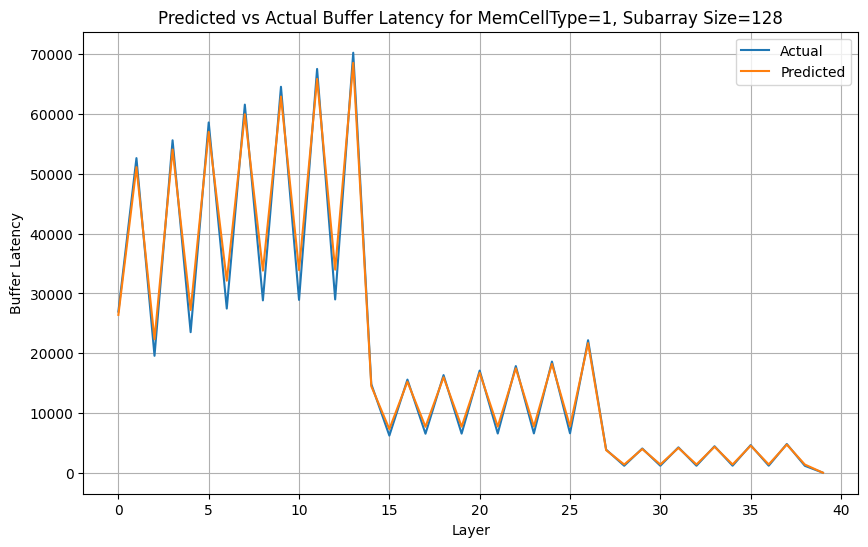

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/BufferLatency.csv', delimiter=',')

# Separate features (X) and target variable (y)
X = data.iloc[:, :2]  # First two columns: MemCellType and numRowSubArray/numColSubArray
y = data.iloc[:, 2:]  # Columns from position 2 onwards: Layer1, Layer2, ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=35)
model.fit(X_train, y_train)

# Predicting BufferLatency for the testing data
predicted_buffer_latency_test = model.predict(X_test)

# Plot a graph comparing the predicted and actual BufferLatency values for a specific MemCellType and numRowSubArray/numColSubArray
mem_cell_type = 1
subarray_size = 128
training_accuracy = model.score(X, y)
print(f"Training Accuracy: {training_accuracy}")

# Filter the testing data for the chosen MemCellType and numRowSubArray/numColSubArray
filtered_data_test = X_test[(X_test['MemCellType'] == mem_cell_type) & (X_test['numRowSubArray/numColSubArray'] == subarray_size)]

if not filtered_data_test.empty:
    index_test = filtered_data_test.index[0]

    # Extract the actual BufferLatency values for the chosen MemCellType and numRowSubArray/numColSubArray
    actual_values_test = y_test.iloc[index_test]

    # Plot the predicted and actual BufferLatency values
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values_test.values, label='Actual')
    plt.plot(predicted_buffer_latency_test[index_test], label='Predicted')
    plt.xlabel('Layer')
    plt.ylabel('Buffer Latency')
    plt.title(f'Predicted vs Actual Buffer Latency for MemCellType={mem_cell_type}, Subarray Size={subarray_size}')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No data found for the specified MemCellType and Subarray Size.")
